In [1]:
import numpy as np
import pandas as pd
import re
import random
from collections import defaultdict, Counter
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
def limpar_texto(texto):
    texto = texto.lower()  # Converte tudo para minúsculas
    texto = re.sub(r'[^\w\s]', ' ', texto)  # Remove pontuações
    texto = re.sub(r'\d+', ' ', texto)      # Remove números
    texto = re.sub(r'\s+', ' ', texto)      # Substitui múltiplos espaços por um só
    return texto.strip()


In [58]:
texto_demo = """
A modelagem de linguagem natural é uma técnica fundamental no campo do Processamento de Linguagem Natural (PLN). Ela permite que computadores compreendam, interpretem, gerem e respondam a textos humanos de forma coerente. Em termos simples, a modelagem de linguagem busca construir representações matemáticas ou estatísticas que descrevam a estrutura e o uso da linguagem humana. Essas representações são essenciais para diversas aplicações, como tradução automática, sistemas de recomendação, chatbots, assistentes virtuais, correção ortográfica, resumo automático de textos, análise de sentimentos e muito mais.

Um modelo de linguagem é, em essência, uma função que recebe uma sequência de palavras e estima a probabilidade de ocorrência da próxima palavra na sequência. Isso é crucial porque nos permite prever palavras com base no contexto anterior, o que é um passo essencial para que um sistema compreenda a linguagem de forma significativa. Por exemplo, se alguém digita "Eu gosto de comer", um bom modelo de linguagem pode prever que as próximas palavras prováveis seriam "pizza", "frutas", "sushi" ou qualquer outro alimento, dependendo do estilo e histórico do texto analisado.

Existem diversos tipos de modelos de linguagem, e eles evoluíram muito ao longo do tempo. Os primeiros modelos eram baseados em regras gramaticais e léxicas definidas por linguistas. Embora esses modelos tivessem uma base sólida, eles eram extremamente limitados e difíceis de manter. Com o avanço da computação e o crescimento de grandes corpora de texto, modelos estatísticos passaram a dominar a área. Entre eles, os modelos baseados em N-grams ganharam grande destaque.

Modelos de N-grams são uma classe simples, porém poderosa, de modelos de linguagem estatística. Eles funcionam baseando-se na suposição de que a ocorrência de uma palavra depende apenas das n − 1 palavras anteriores. Por exemplo, em um modelo bigrama (n = 2), a próxima palavra depende apenas da palavra imediatamente anterior. Já em um modelo trigram (n = 3), o modelo considera as duas palavras anteriores como contexto.

A ideia por trás dos modelos N-gramas é utilizar grandes conjuntos de dados textuais (corpora) para contar a frequência de cada sequência de palavras de tamanho n. Com essas contagens, podemos estimar probabilidades. Por exemplo, a probabilidade de "de linguagem" ocorrer pode ser estimada como a frequência de "de linguagem" dividida pela frequência de "de". Isso nos permite gerar ou prever sequências de palavras com base em dados reais, o que já é útil em diversas aplicações simples.

Entretanto, os modelos N-gramas têm suas limitações. Uma das principais é o problema da esparsidade: à medida que o valor de n aumenta, o número de combinações possíveis de palavras também aumenta exponencialmente. Isso significa que muitos N-gramas possíveis podem nunca aparecer no corpus de treinamento, resultando em probabilidades nulas e baixa cobertura. Para mitigar isso, técnicas de suavização (como Laplace, Good-Turing ou Kneser-Ney) são aplicadas para redistribuir as probabilidades e evitar zeros.

Além disso, os modelos N-gramas não capturam dependências de longo alcance. Por exemplo, em uma frase como "O cachorro que estava na casa do meu amigo latiu", a dependência entre "cachorro" e "latiu" pode ser ignorada por um modelo que só considera os dois ou três últimos termos. Isso limita a capacidade do modelo de compreender a estrutura sintática e semântica do texto.

Com o avanço das redes neurais e do aprendizado profundo, surgiram os modelos neurais de linguagem. Esses modelos vão além da contagem de palavras e são capazes de capturar padrões complexos e contextos de longo alcance. Um exemplo clássico é o Word2Vec, que representa palavras em vetores de alta dimensionalidade com base no contexto em que aparecem. Palavras com significados semelhantes acabam ficando próximas umas das outras nesse espaço vetorial. Isso já foi um grande passo à frente, pois permitiu que máquinas compreendessem similaridades semânticas.

Posteriormente, redes neurais recorrentes (RNNs) e, mais tarde, as LSTM (Long Short-Term Memory) e GRU (Gated Recurrent Unit) foram aplicadas na modelagem de linguagem. Esses modelos conseguem reter informações ao longo de sequências mais longas, lidando melhor com dependências distantes. Com eles, tarefas como tradução automática e geração de texto se tornaram muito mais naturais e eficientes.

No entanto, o maior avanço na modelagem de linguagem natural veio com os Transformers, introduzidos em 2017 no artigo "Attention is All You Need". O modelo Transformer eliminou a necessidade de processamento sequencial das RNNs e introduziu o mecanismo de atenção, permitindo que o modelo focasse em diferentes partes do texto com diferentes pesos. Com isso, tornou-se possível capturar contextos globais de forma muito mais eficiente.

Modelos como BERT (Bidirectional Encoder Representations from Transformers) e GPT (Generative Pre-trained Transformer) demonstraram um desempenho impressionante em uma ampla gama de tarefas de PLN. Esses modelos são treinados em grandes quantidades de dados textuais e aprendem representações linguísticas profundas. BERT é particularmente poderoso em tarefas de compreensão de linguagem, enquanto a série GPT é voltada para geração de texto.

A chegada desses modelos pré-treinados revolucionou o campo. Antes, era necessário treinar modelos do zero para cada tarefa. Agora, é possível aproveitar modelos como GPT, BERT, RoBERTa, T5 e outros e ajustá-los (fine-tuning) para tarefas específicas com muito menos dados e tempo de treinamento.

Apesar de todo esse progresso, a modelagem de linguagem natural ainda enfrenta desafios. A ambiguidade linguística, o uso de ironia, sarcasmo, expressões idiomáticas, contextos culturais e a variação de estilos são barreiras importantes para uma compreensão profunda da linguagem. Além disso, os modelos de linguagem atuais, por mais poderosos que sejam, ainda não "entendem" a linguagem no sentido humano da palavra. Eles baseiam suas previsões em padrões estatísticos, e não em uma compreensão real do mundo.

Outro ponto importante a se considerar é a ética no uso de modelos de linguagem. Como eles são treinados em grandes quantidades de dados coletados da internet, podem incorporar vieses sociais, políticos, raciais ou de gênero. Isso exige um cuidado especial na curadoria dos dados de treinamento, bem como na interpretação dos resultados.

A modelagem de linguagem natural continua evoluindo rapidamente. Novos modelos, arquiteturas e abordagens continuam a ser desenvolvidos, buscando melhorar a precisão, reduzir o viés e tornar a interação homem-máquina ainda mais natural. Entre as tendências atuais estão os modelos multimodais (que combinam texto, imagem e áudio), a adaptação de modelos para idiomas de baixo recurso (com poucos dados disponíveis), e a busca por modelos mais eficientes e menos custosos computacionalmente.

Em resumo, a modelagem de linguagem natural é uma área extremamente rica, multidisciplinar e fundamental para a inteligência artificial moderna. Ela conecta linguística, estatística, ciência da computação e aprendizado de máquina em busca de uma comunicação mais fluida entre humanos e máquinas. Desde os simples modelos de N-gramas até os sofisticados Transformers, a evolução dessa técnica mostra como estamos cada vez mais próximos de desenvolver sistemas capazes de dialogar, compreender e gerar linguagem de maneira incrivelmente convincente. À medida que a tecnologia avança, novas possibilidades surgem, e o futuro da interação homem-máquina se torna cada vez mais promissor.
"""

In [59]:
palavras = limpar_texto(texto_demo).split()
print("Quantidade de palavras:", len(palavras))
print("Exemplo:", palavras[:10])


Quantidade de palavras: 1152
Exemplo: ['a', 'modelagem', 'de', 'linguagem', 'natural', 'é', 'uma', 'técnica', 'fundamental', 'no']


In [60]:
class ModeloNGram:
    def __init__(self, n):
        self.n = n
        self.contagens = defaultdict(Counter)
        self.modelo = {}

    def treinar(self, palavras):
        for i in range(len(palavras) - self.n + 1):
            contexto = tuple(palavras[i:i+self.n-1])
            alvo = palavras[i+self.n-1]
            self.contagens[contexto][alvo] += 1

        for contexto, alvos in self.contagens.items():
            total = sum(alvos.values())
            self.modelo[contexto] = {
                palavra: freq / total for palavra, freq in alvos.items()
            }

    def proxima_palavra(self, contexto):
        contexto = tuple(contexto[-(self.n-1):]) if self.n > 1 else ()
        if contexto in self.modelo:
            palavras = list(self.modelo[contexto].keys())
            probs = list(self.modelo[contexto].values())
            return np.random.choice(palavras, p=probs)
        return None

    def gerar_texto(self, contexto_inicial, quantidade=15):
        if isinstance(contexto_inicial, str):
            contexto_inicial = contexto_inicial.split()
        if len(contexto_inicial) < self.n - 1:
            raise ValueError(f"Contexto inicial deve ter pelo menos {self.n - 1} palavras")
        texto = list(contexto_inicial)
        for _ in range(quantidade):
            prox = self.proxima_palavra(texto)
            if not prox:
                break
            texto.append(prox)
        return ' '.join(texto)
    

In [61]:
modelo_1gram = ModeloNGram(1)
modelo_2gram = ModeloNGram(2)
modelo_3gram = ModeloNGram(3)

modelo_1gram.treinar(palavras)
modelo_2gram.treinar(palavras)
modelo_3gram.treinar(palavras)

In [8]:
def calcular_perplexidade(modelo, texto_teste):
    tokens = limpar_texto(texto_teste).split()
    log_prob = 0
    total = 0
    for i in range(modelo.n - 1, len(tokens)):
        contexto = tuple(tokens[i - modelo.n + 1:i]) if modelo.n > 1 else ()
        alvo = tokens[i]
        prob = modelo.modelo.get(contexto, {}).get(alvo, 1e-10)
        log_prob += np.log2(prob)
        total += 1
    return 2 ** (-log_prob / total) if total > 0 else float('inf')

texto_teste = """
Os modelos de linguagem são fundamentais para diversas aplicações.
A modelagem estatística ajuda a entender padrões em textos.
"""

print("Perplexidade:")
print("Unigram:", calcular_perplexidade(modelo_1gram, texto_teste))
print("Bigram:", calcular_perplexidade(modelo_2gram, texto_teste))
print("Trigram:", calcular_perplexidade(modelo_3gram, texto_teste))


Perplexidade:
Unigram: 21321.741265907596
Bigram: 12753811.709930701
Trigram: 587238302.6717716


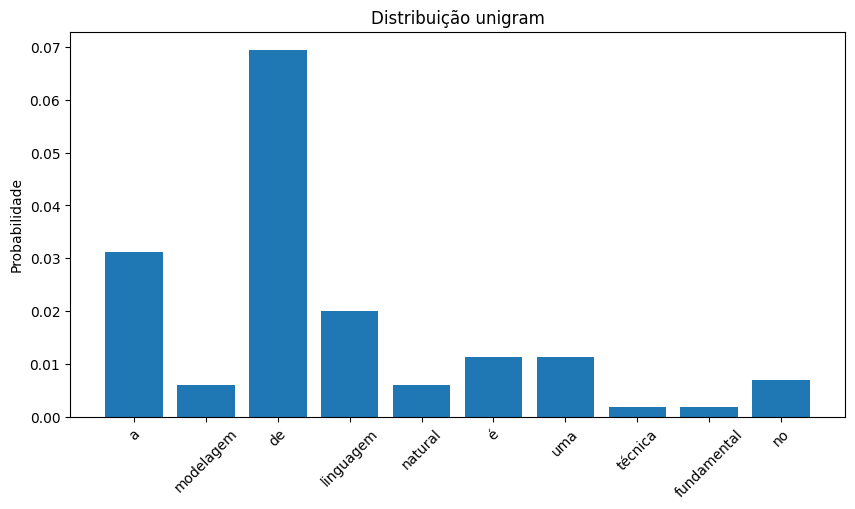

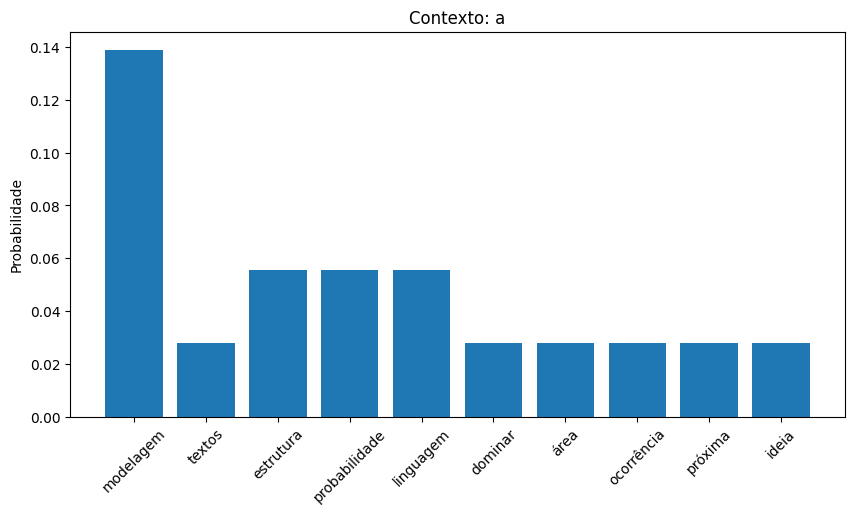

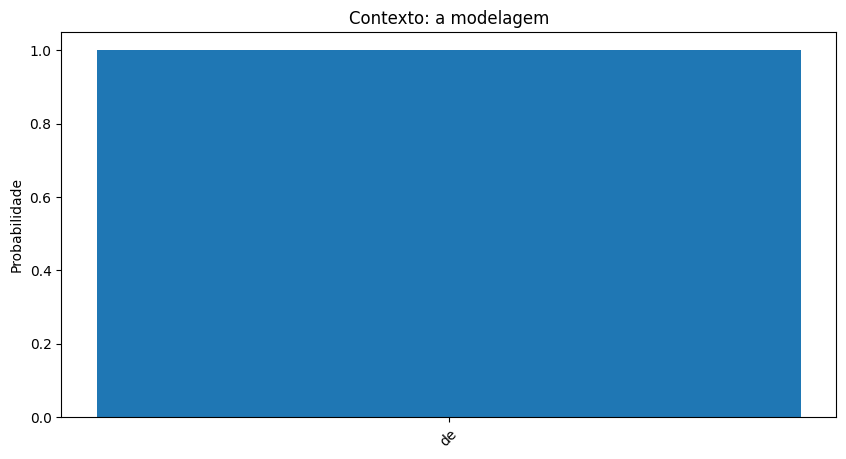

In [62]:
def mostrar_distribuicao(modelo, contexto=None):
    if modelo.n == 1:
        contexto = ()
    if contexto is None or contexto not in modelo.modelo:
        contexto = list(modelo.modelo.keys())[0]
    palavras = list(modelo.modelo[contexto].keys())
    probs = list(modelo.modelo[contexto].values())
    plt.figure(figsize=(10,5))
    plt.bar(palavras[:10], probs[:10])
    titulo = "Distribuição unigram" if modelo.n == 1 else f"Contexto: {' '.join(contexto)}"
    plt.title(titulo)
    plt.ylabel("Probabilidade")
    plt.xticks(rotation=45)
    plt.show()

mostrar_distribuicao(modelo_1gram)
mostrar_distribuicao(modelo_2gram)
mostrar_distribuicao(modelo_3gram)

In [63]:
def distancia_edicao(s1, s2):
    if len(s1) < len(s2):
        return distancia_edicao(s2, s1)
    if len(s2) == 0:
        return len(s1)
    anterior = list(range(len(s2) + 1))
    for i, c1 in enumerate(s1):
        atual = [i + 1]
        for j, c2 in enumerate(s2):
            custos = [
                anterior[j + 1] + 1,
                atual[j] + 1,
                anterior[j] + (c1 != c2)
            ]
            atual.append(min(custos))
        anterior = atual
    return anterior[-1]

def sugerir_palavra(palavra, modelo):
    if palavra in modelo.modelo[()]:
        return palavra
    candidatos = []
    for voc in modelo.modelo[()]:
        dist = distancia_edicao(palavra, voc)
        if dist <= 2:
            prob = modelo.modelo[()].get(voc, 0)
            candidatos.append((voc, dist, prob))
    if not candidatos:
        return palavra
    candidatos.sort(key=lambda x: (x[1], -x[2]))
    return candidatos[0][0]

In [64]:
palavras_erradas = ["modelgem", "linguaem", "natual", "processment"]
print("Correções sugeridas:")
for erro in palavras_erradas:
    print(f"{erro} → {sugerir_palavra(erro, modelo_1gram)}")

Correções sugeridas:
modelgem → modelagem
linguaem → linguagem
natual → natural
processment → processamento


In [65]:
print("Textos gerados:")
print("Unigram:", modelo_1gram.gerar_texto([], 10))
print("Bigram:", modelo_2gram.gerar_texto(["linguagem"], 15))
print("Trigram:", modelo_3gram.gerar_texto(["modelos", "de"], 50))

Textos gerados:
Unigram: tornar mais inteligência em abordagens longo word linguagem quantidades de
Bigram: linguagem no uso de modelos de dados textuais e o maior avanço da próxima palavra depende
Trigram: modelos de n grams ganharam grande destaque modelos de n grams são uma classe simples porém poderosa de modelos para idiomas de baixo recurso com poucos dados disponíveis e a busca por modelos mais eficientes e menos custosos computacionalmente em resumo a modelagem de linguagem pode prever que as próximas palavras prováveis


In [66]:
modelo_1gram = ModeloNGram(1)
modelo_2gram = ModeloNGram(2)
modelo_7gram = ModeloNGram(7)

modelo_1gram.treinar(palavras)
modelo_2gram.treinar(palavras)
modelo_7gram.treinar(palavras)

In [67]:
def calcular_perplexidade(modelo, texto_teste):
    tokens = limpar_texto(texto_teste).split()
    log_prob = 0
    total = 0
    for i in range(modelo.n - 1, len(tokens)):
        contexto = tuple(tokens[i - modelo.n + 1:i]) if modelo.n > 1 else ()
        alvo = tokens[i]
        prob = modelo.modelo.get(contexto, {}).get(alvo, 1e-10)
        log_prob += np.log2(prob)
        total += 1
    return 2 ** (-log_prob / total) if total > 0 else float('inf')

texto_teste = """
Os modelos de linguagem são fundamentais para diversas aplicações.
A modelagem estatística ajuda a entender padrões em textos.
"""

print("Perplexidade:")
print("Unigram:", calcular_perplexidade(modelo_1gram, texto_teste))
print("Bigram:", calcular_perplexidade(modelo_2gram, texto_teste))
print("SEVEN:", calcular_perplexidade(modelo_7gram, texto_teste))

Perplexidade:
Unigram: 2618.8094681728858
Bigram: 4702489.2897860585
SEVEN: 10000000000.000008


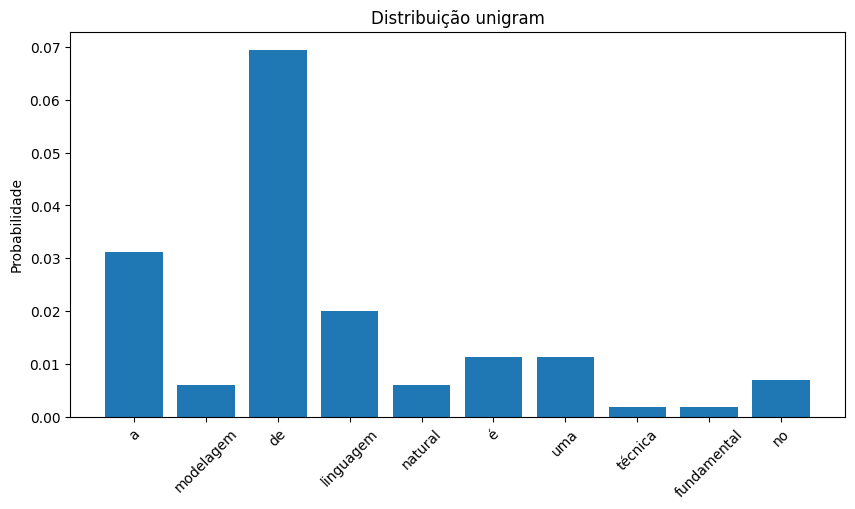

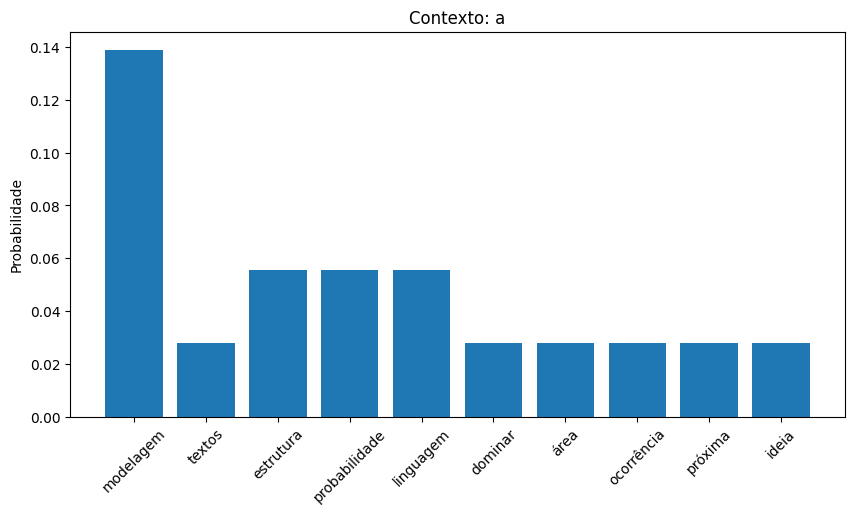

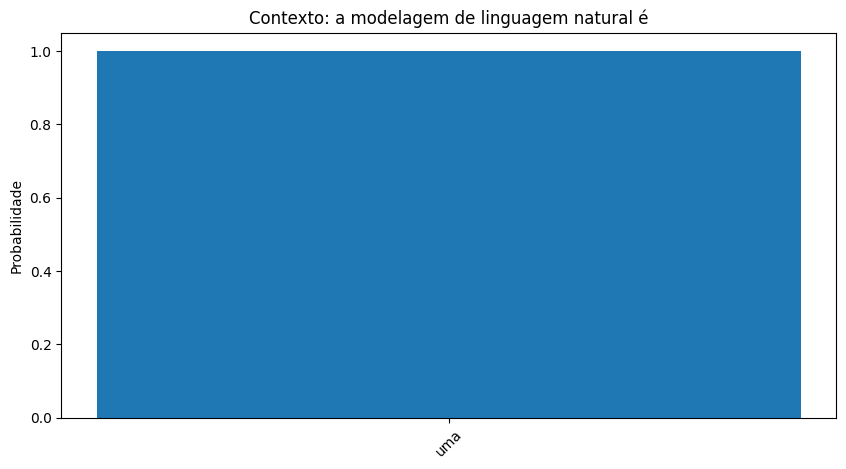

In [68]:
def mostrar_distribuicao(modelo, contexto=None):
    if modelo.n == 1:
        contexto = ()
    if contexto is None or contexto not in modelo.modelo:
        contexto = list(modelo.modelo.keys())[0]
    palavras = list(modelo.modelo[contexto].keys())
    probs = list(modelo.modelo[contexto].values())
    plt.figure(figsize=(10,5))
    plt.bar(palavras[:10], probs[:10])
    titulo = "Distribuição unigram" if modelo.n == 1 else f"Contexto: {' '.join(contexto)}"
    plt.title(titulo)
    plt.ylabel("Probabilidade")
    plt.xticks(rotation=45)
    plt.show()

mostrar_distribuicao(modelo_1gram)
mostrar_distribuicao(modelo_2gram)
mostrar_distribuicao(modelo_7gram)

In [69]:
def distancia_edicao(s1, s2):
    if len(s1) < len(s2):
        return distancia_edicao(s2, s1)
    if len(s2) == 0:
        return len(s1)
    anterior = list(range(len(s2) + 1))
    for i, c1 in enumerate(s1):
        atual = [i + 1]
        for j, c2 in enumerate(s2):
            custos = [
                anterior[j + 1] + 1,
                atual[j] + 1,
                anterior[j] + (c1 != c2)
            ]
            atual.append(min(custos))
        anterior = atual
    return anterior[-1]

def sugerir_palavra(palavra, modelo):
    if palavra in modelo.modelo[()]:
        return palavra
    candidatos = []
    for voc in modelo.modelo[()]:
        dist = distancia_edicao(palavra, voc)
        if dist <= 2:
            prob = modelo.modelo[()].get(voc, 0)
            candidatos.append((voc, dist, prob))
    if not candidatos:
        return palavra
    candidatos.sort(key=lambda x: (x[1], -x[2]))
    return candidatos[0][0]

In [70]:
palavras_erradas = ["modelgem", "linguaem", "natual", "processment"]
print("Correções sugeridas:")
for erro in palavras_erradas:
    print(f"{erro} → {sugerir_palavra(erro, modelo_1gram)}")

Correções sugeridas:
modelgem → modelagem
linguaem → linguagem
natual → natural
processment → processamento


In [71]:
print("Textos gerados:")
print("Unigram:", modelo_1gram.gerar_texto([], 15))
print("Bigram:", modelo_2gram.gerar_texto(["linguagem"], 15))
print("Trigram:", modelo_7gram.gerar_texto(["modelos", "de"], 15))

Textos gerados:
Unigram: e prováveis contagem expressões ortográfica reter se cuidado com baixo que menos técnicas compreender de
Bigram: linguagem humana essas representações linguísticas profundas bert é uma compreensão real do mundo outro alimento dependendo


ValueError: Contexto inicial deve ter pelo menos 6 palavras

In [72]:
class ModeloNGram:
    def __init__(self, n):
        self.n = n
        self.contagens = defaultdict(Counter)
        self.modelo = {}

    def treinar(self, palavras):
        for i in range(len(palavras) - self.n + 1):
            contexto = tuple(palavras[i:i+self.n-1])
            alvo = palavras[i+self.n-1]
            self.contagens[contexto][alvo] += 7

        for contexto, alvos in self.contagens.items():
            total = sum(alvos.values())
            self.modelo[contexto] = {
                palavra: freq / total for palavra, freq in alvos.items()
            }

    def proxima_palavra(self, contexto):
        contexto = tuple(contexto[-(self.n-1):]) if self.n > 1 else ()
        if contexto in self.modelo:
            palavras = list(self.modelo[contexto].keys())
            probs = list(self.modelo[contexto].values())
            return np.random.choice(palavras, p=probs)
        return None

    def gerar_texto(self, contexto_inicial, quantidade=15):
        if isinstance(contexto_inicial, str):
            contexto_inicial = contexto_inicial.split()
        if len(contexto_inicial) < self.n - 1:
            raise ValueError(f"Contexto inicial deve ter pelo menos {self.n - 1} palavras")
        texto = list(contexto_inicial)
        for _ in range(quantidade):
            prox = self.proxima_palavra(texto)
            if not prox:
                break
            texto.append(prox)
        return ' '.join(texto)

In [73]:
print("Textos gerados:")
print("Unigram:", modelo_1gram.gerar_texto([], 15))
print("Bigram:", modelo_2gram.gerar_texto(["linguagem"], 15))
print("Trigram:", modelo_7gram.gerar_texto(["modelos", "de", "linguagem", "natural", "sequencia", "processamento"],50))

Textos gerados:
Unigram: modelos os qualquer estatísticos além que mais contar útil incorporar que t humanos poderosa importantes
Bigram: linguagem é útil em regras gramaticais e não capturam dependências distantes com muito menos dados coletados
Trigram: modelos de linguagem natural sequencia processamento


In [43]:
print("Textos gerados:")
print("Unigram:", modelo_1gram.gerar_texto([], 15))
print("Bigram:", modelo_2gram.gerar_texto(["linguagem"], 15))
print("Trigram:", modelo_7gram.gerar_texto(["modelos", "de"],50))

Textos gerados:
Unigram: próxima de a uma natural de uma ainda úteis modelos úteis no mas linguagem modelos
Bigram: linguagem natural os modelos de linguagem podem ser usados para prever a modelagem de linguagem incluindo


ValueError: Contexto inicial deve ter pelo menos 6 palavras

In [75]:
print("Textos gerados:")
print("Unigram:", modelo_1gram.gerar_texto([], 15))
print("Bigram:", modelo_2gram.gerar_texto(["linguagem"], 15 ))
print("Trigram:", modelo_7gram.gerar_texto(['a', 'modelagem', 'de', 'linguagem', 'natural', 'é', 'uma', 'técnica', 'fundamental', 'no'], 50))

Textos gerados:
Unigram: suposição bert uma o grandes de n conjuntos estatísticos como meu linguagem a e em
Bigram: linguagem natural ainda mais natural é utilizar grandes quantidades de forma muito ao longo do aprendizado
Trigram: a modelagem de linguagem natural é uma técnica fundamental no campo do processamento de linguagem natural pln ela permite que computadores compreendam interpretem gerem e respondam a textos humanos de forma coerente em termos simples a modelagem de linguagem busca construir representações matemáticas ou estatísticas que descrevam a estrutura e o uso da linguagem humana essas representações são essenciais para
